In [47]:
# store_data=pd.read_csv("Market_Basket_Optimisation.csv",header=None)
# # store_data=store_data.fillna(0)
# # store_data.dropna()
# num_records=len(store_data)
# num_records

In [49]:
# records=[]
# for i in range(0,num_records):
#     records.append([str(store_data.values[i,j])  for j in range(0,20)])

In [50]:
# association_rule=apriori(records,min_support=0.003,min_confidance=0.20,min_lift=3,min_length=2)
# association_results=list(association_rule)

In [51]:
# print(len(association_results))

In [52]:
# print(association_results[0])

In [1]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
##### import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules

df=pd.read_csv("basket.csv")

all_items=list(item for sublist in df.values.tolist() for item in sublist if pd.notna(item))
unique_items = list(set(all_items))[:200]
df_subset = df.head(200)
encoded_df=pd.DataFrame(0,index=range(len(df)),columns=unique_items)
for index,transaction in df_subset.iterrows():
    for item in transaction.dropna():
        encoded_df.loc[index,item]=1

# print(encoded_df)
min_support=0.3
min_confident=0.7

# frequent_items=apriori(encoded_df,minsupport=min_support,use_colnames=True)
# rules=association_rules(frequent_items,metric="confidence",min_threshold=min_confidece)
# Step 4: Apply the Apriori algorithm to find frequent itemsets
frequent_items = apriori(encoded_df, min_support=min_support, use_colnames=True)

# Step 5: Generate association rules based on the frequent itemsets
rules = association_rules(frequent_items, metric="confidence", min_threshold=min_confident)

# Output the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_items)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support               itemsets
0  0.363636               (cookie)
1  0.454545                 (milk)
2  0.409091                 (eggs)
3  0.500000                (bread)
4  0.363636         (cookie, milk)
5  0.363636        (bread, cookie)
6  0.409091          (bread, milk)
7  0.363636  (bread, cookie, milk)

Association Rules:
        antecedents      consequents  antecedent support  consequent support  \
0          (cookie)           (milk)            0.363636            0.454545   
1            (milk)         (cookie)            0.454545            0.363636   
2           (bread)         (cookie)            0.500000            0.363636   
3          (cookie)          (bread)            0.363636            0.500000   
4           (bread)           (milk)            0.500000            0.454545   
5            (milk)          (bread)            0.454545            0.500000   
6   (bread, cookie)           (milk)            0.363636            0.454545   
7     

C:\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [64]:
# print(encoded_df)

In [66]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Step 1: Load the dataset
df = pd.read_csv("basket.csv")

# Step 2: Prepare the dataset by creating a one-hot encoded DataFrame
all_items = list(item for sublist in df.values.tolist() for item in sublist if pd.notna(item))

# Limit the dataset to the first 200 unique items and 200 rows
unique_items = list(set(all_items))[:200]
df_subset = df.head(200)

# Create a one-hot encoded DataFrame for 200 rows and 200 unique items
encoded_df = pd.DataFrame(0, index=range(len(df_subset)), columns=unique_items)

# One-hot encode the data
for index, transaction in df_subset.iterrows():
    for item in transaction.dropna():
        if item in unique_items:  # Only include the items in the 200-item subset
            encoded_df.loc[index, item] = 1

# Step 3: Set minimum support and confidence thresholds
min_support = 0.2  # Lower support threshold to capture more itemsets
min_confidence = 0.7

# Step 4: Apply FP-growth algorithm to find frequent itemsets
frequent_items = fpgrowth(encoded_df, min_support=min_support, use_colnames=True)

# Step 5: Generate association rules based on the frequent itemsets
rules = association_rules(frequent_items, metric="confidence", min_threshold=min_confidence)

# Sort the rules by confidence and support for the "best" rules
best_rules = rules.sort_values(by=['confidence', 'support'], ascending=False)

# Output the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_items)

print("\nBest Association Rules (sorted by confidence and support):")
print(best_rules)


Frequent Itemsets:
     support               itemsets
0   0.421053                (bread)
1   0.315789               (diaper)
2   0.368421                 (milk)
3   0.263158               (cookie)
4   0.421053                 (eggs)
5   0.263158        (bread, diaper)
6   0.210526         (milk, diaper)
7   0.315789          (bread, milk)
8   0.263158         (milk, cookie)
9   0.263158        (bread, cookie)
10  0.263158  (bread, milk, cookie)

Best Association Rules (sorted by confidence and support):
        antecedents      consequents  antecedent support  ...  leverage  conviction  zhangs_metric
4          (cookie)           (milk)            0.263158  ...  0.166205         inf       0.857143
5          (cookie)          (bread)            0.263158  ...  0.152355         inf       0.785714
7   (bread, cookie)           (milk)            0.263158  ...  0.166205         inf       0.857143
8    (milk, cookie)          (bread)            0.263158  ...  0.152355         inf       0.7

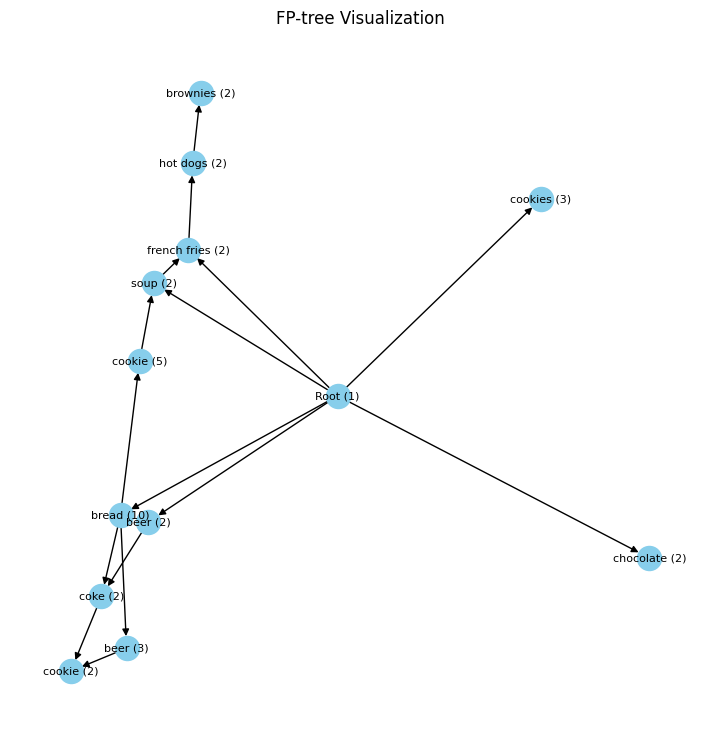

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Load the dataset
df = pd.read_csv("basket.csv")

# Step 2: Prepare the dataset (simplified)
all_items = list(item for sublist in df.values.tolist() for item in sublist if pd.notna(item))
unique_items = list(set(all_items))[:10]  # Limit to 10 unique items for simplicity
df_subset = df.head(20)  # Use first 20 transactions

# Step 3: One-hot encode the dataset (optional)
encoded_df = pd.DataFrame(0, index=range(len(df_subset)), columns=unique_items)
for index, transaction in df_subset.iterrows():
    for item in transaction.dropna():
        if item in unique_items:
            encoded_df.loc[index, item] = 1

# Step 4: Build a basic FP-tree (simplified for visualization)
class TreeNode:
    def __init__(self, item, count=1):
        self.item = item
        self.count = count
        self.children = {}
        self.parent = None
    
    def add_child(self, item):
        if item not in self.children:
            child_node = TreeNode(item)
            self.children[item] = child_node
            child_node.parent = self
        return self.children[item]

def build_fp_tree(transactions):
    root = TreeNode("Root")
    for transaction in transactions:
        current_node = root
        for item in transaction:
            current_node = current_node.add_child(item)
            current_node.count += 1
    return root

# Get transactions (sorted by frequency)
def get_transactions(df):
    transactions = []
    for index, row in df.iterrows():
        transaction = [item for item in row.dropna() if item in unique_items]
        transactions.append(transaction)
    return transactions

transactions = get_transactions(df_subset)
fp_tree_root = build_fp_tree(transactions)

# Step 5: Visualize the FP-tree using networkx
def visualize_fp_tree(root):
    G = nx.DiGraph()  # Directed graph to represent tree
    node_labels = {}

    def add_edges(node, parent_name=None):
        node_name = f"{node.item} ({node.count})"
        if parent_name:
            G.add_edge(parent_name, node_name)
        node_labels[node_name] = f"{node.item}: {node.count}"
        for child in node.children.values():
            add_edges(child, node_name)

    add_edges(root)

    plt.figure(figsize=(7, 7))
    pos = nx.spring_layout(G)  # Layout for tree
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=300, font_size=8, font_color="black", font_weight="normal")
    # nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    plt.title("FP-tree Visualization")
    plt.show()

# Step 6: Call the function to visualize the FP-tree
visualize_fp_tree(fp_tree_root)


In [69]:
pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
import scipy.cluster.hierarchy as sch

In [72]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [46]:
pip install seaborn

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

class FPTreeNode:
    def __init__(self, item, count, parent):
        self.item = item
        self.count = count
        self.parent = parent
        self.children = {}
        self.link = None

class FPTree:
    def __init__(self):
        self.root = FPTreeNode(None, 1, None)
        self.headers = defaultdict(list)

    def insert(self, transaction):
        current_node = self.root
        for item in transaction:
            if item in current_node.children:
                current_node.children[item].count += 1
            else:
                new_node = FPTreeNode(item, 1, current_node)
                current_node.children[item] = new_node
                self.headers[item].append(new_node)
            current_node = current_node.children[item]

    def draw_tree(self):
        G = nx.DiGraph()
        labels = {}

        def add_edges(node, parent_name=None):
            node_name = f"{node.item} ({node.count})" if node.item else "Root"
            if parent_name:
                G.add_edge(parent_name, node_name)
            labels[node_name] = node.item
            for child in node.children.values():
                add_edges(child, node_name)

        add_edges(self.root)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, labels=labels, node_color="skyblue", node_size=3000, font_size=10, font_weight="bold", arrows=True)
        plt.show()

# Example of creating an FP-Tree with some transactions
transactions = pd.read_csv("basket.csv")
transaction=transaction

# Build the FP-Tree
fp_tree = FPTree()
for transaction in transactions:
    fp_tree.insert(sorted(transaction))  # Insert sorted transactions

# Visualize the FP-Tree
fp_tree.draw_tree()


AttributeError: 'str' object has no attribute 'head'

In [54]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

# Example basket dataset
# data = {'bread': [1, 0, 1, 1, 0],
#         'milk': [1, 1, 0, 1, 1],
#         'beer': [0, 1, 1, 1, 0],
#         'diapers': [1, 1, 0, 1, 1],
#         'eggs': [0, 0, 1, 0, 1]}

# # Convert data into a DataFrame
# df = pd.DataFrame(df)

# Run the FP-Growth algorithm with a minimum support threshold
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Derive association rules based on confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the association rules
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support         itemsets
0      0.8        (diapers)
1      0.8           (milk)
2      0.6          (bread)
3      0.6           (beer)
4      0.8  (diapers, milk)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0   (diapers)      (milk)                 0.8                 0.8      0.8   
1      (milk)   (diapers)                 0.8                 0.8      0.8   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0  1.25      0.16         inf            1.0  
1         1.0  1.25      0.16         inf            1.0  


C:\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



FP-tree structure:


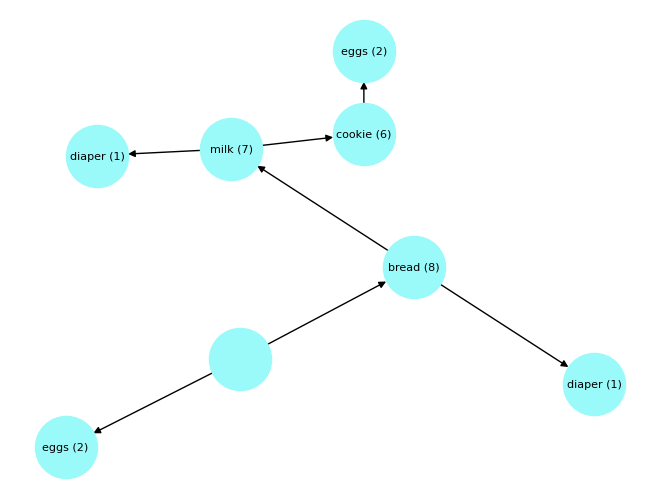